<style>
div.cell, div.text_cell_render{
  max-width:750px;
  margin-left:auto;
  margin-right:auto;
}

.rendered_html
{
  font-size: 140%;
  }

.rendered_html li
{
  line-height: 1.8;
  }

.rendered_html h1, h2 {
  text-align:center;
  font-familly:"Charis SIL", serif;
}
</style>

<small><i>This notebook was put together by [Jake Vanderplas](http://www.vanderplas.com) for UW's [Astro 599](http://www.astro.washington.edu/users/vanderplas/Astr599/) course. Source and license info is on [GitHub](https://github.com/jakevdp/2013_fall_ASTR599/).</i></small>

# Machine Learning with Scikit-Learn: Validation and Model Selection

This is an intermediate-level tutorial on Scikit-learn.  It will assume that you're familiar with the following:

- The basics of manipulating numpy arrays and plotting with matplotlib
- The data representation used in scikit-learn
- The concepts of Supervised learning (e.g. classification & regression) and Unsupervised learning (e.g. dimensionality reduction and clustering)
- The API of scikit-learn: the Estimator interface, particularly
  + instantiation of estimators
  + the ``fit()`` method for supervised and unsupervised learning
  + the ``predict()`` method for supervised learning (also clustering)
  + the ``transform()`` method in unsupervised learning
  + the ``score()`` method in supervised and unsupervised learning
  
If you need to brush up on any of this, you can check out the notebooks associated with
my [Astr 599: Scientific Computing](http://www.astro.washington.edu/users/vanderplas/Astr599/schedule) Course at University of Washington.
  
Here we will very briefly review these points, before getting into the main part of this tutorial, which focuses on **validation** and **model selection**.

# Quick Review of essential concepts

Here we'll spend a few minutes talking about and demonstrating some things that — hopefully! — should be familiar.

## What is Machine Learning?

Machine Learning is about building programs with **tunable parameters** (typically an
array of floating point values) that are adjusted automatically so as to improve
their behavior by **adapting to previously seen data.**

Machine Learning can be considered a subfield of **Artificial Intelligence** since those
algorithms can be seen as building blocks to make computers learn to behave more
intelligently by somehow **generalizing** rather that just storing and retrieving data items
like a database system would do.

## Data representation in scikit-learn

Data in scikit-learn is represented as a **feature matrix** and a **label vector**

$$
{\rm feature~matrix:~~~} {\bf X}~=~\left[
\begin{matrix}
x_{11} & x_{12} & \cdots & x_{1D}\\
x_{21} & x_{22} & \cdots & x_{2D}\\
x_{31} & x_{32} & \cdots & x_{3D}\\
\vdots & \vdots & \ddots & \vdots\\
\vdots & \vdots & \ddots & \vdots\\
x_{N1} & x_{N2} & \cdots & x_{ND}\\
\end{matrix}
\right]
$$

$$
{\rm label~vector:~~~} {\bf y}~=~ [y_1, y_2, y_3, \cdots y_N]
$$

Here there are $N$ samples and $D$ features.
Several example datasets are available in the ``sklearn.datasets`` module:

In [36]:
from sklearn import datasets
iris = datasets.load_iris()
print iris.keys()

['target_names', 'data', 'target', 'DESCR', 'feature_names']


In [37]:
X = iris.data
y = iris.target

In [38]:
print X.shape
print y.shape

(150L, 4L)
(150L,)


In [39]:
# C:\Anaconda\pkgs\scikit-learn-0.15.2-np19py27_p0\Lib\site-packages\sklearn\datasets\data

We see that the iris data has 150 **samples** and 4 **features**: that is,
observations of 4 measurements on each of 150 different iris flowers.

In code, we usually denote these numbers ``n_samples`` and ``n_features``:

In [40]:
n_samples, n_features = X.shape
len(y) == n_samples

True

### What do features and labels mean?

In the case of the iris dataset, the features are **measured lengths and widths of petals and sepals**:

In [41]:
print iris.feature_names
print len(iris.feature_names) == n_features

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
True


Features can be any **uniformly measured** numerical observation of the data. For example, in the digits data, the features are the brightness of each pixel:

In [42]:
digits = datasets.load_digits()
digits.data.shape
# C:\Anaconda\pkgs\scikit-learn-0.15.2-np19py27_p0\Lib\site-packages\sklearn\datasets\base.py

(1797L, 64L)

In [43]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

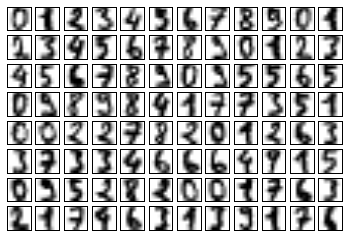

In [44]:
fig, ax = plt.subplots(8, 12, subplot_kw={'xticks':[], 'yticks':[]})

for i in range(ax.size):
    ax.flat[i].imshow(digits.data[i].reshape(8, 8),
                      cmap=plt.cm.binary)

Later, we'll see an example of using the digits data in a learning problem.

## Supervised vs. Unsupervised Learning

The algorithms of machine learning are generally split into two basic categories: **Supervised** and **Unsupervised** learning.

### Supervised Learning
**Supervised** learning concerns **labeled** data, and the construction of models that can be used to predict labels for new, unlabeled data.

*Example:* given a set of *labeled* hand-written digits, create an algorithm which will predict the label of a new instance for which a label is not known.

### Unsupervised Learning
**Unsupervised** learning concerns **unlabeled** data, and finding structure in the data such as clusters, important dimensions, etc.

*Example:* given a set of *unlabeled* digits, determine which digits are related.

## Supervised Learning: Classifying Digits

Let's return to the digits data and show a quick classification example, using the simple-and-fast Gaussian Naive Bayes estimator.

In [45]:
from sklearn.naive_bayes import GaussianNB
X = digits.data
y = digits.target

# Instantiate the estimator
clf = GaussianNB()

# Fit the estimator to the data, leaving out the last five samples
clf.fit(X[:-5], y[:-5])

# Use the model to predict the last several labels
y_pred = clf.predict(X[-5:])

print y_pred
print y[-5:]

[9 0 8 9 8]
[9 0 8 9 8]


We see that this relatively simple model leads to a perfect classification of the last few digits!

Let's use the model to predict labes for the full dataset, and plot the **confusion matrix**, which is a convenient visual representation of how well the classifier performs:

classification accuracy: 0.827490261547


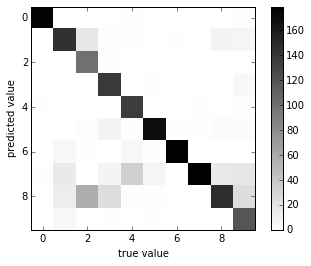

In [46]:
from sklearn import metrics

clf = GaussianNB()
clf.fit(X, y)
y_pred = clf.predict(X)

def plot_confusion_matrix(y_pred, y):
    plt.imshow(metrics.confusion_matrix(y, y_pred),
               cmap=plt.cm.binary, interpolation='nearest')
    plt.colorbar()
    plt.xlabel('true value')
    plt.ylabel('predicted value')
    
print "classification accuracy:", metrics.accuracy_score(y, y_pred)
plot_confusion_matrix(y, y_pred)

Interestingly, there is confusion between some values.  In particular, the number **2** is often mistaken for the number **8** by this model!  But for the vast majority of digits, we can see that the lassification looks correct.

Let's use the ``metrics`` submodule again to print the accuracy of the classification:

In [47]:
print metrics.accuracy_score(y, y_pred)

0.827490261547


We have an 82% accuracy rate with this particular model.

But there's a problem: we are testing the model on the data we used to train the model. As we'll see later, this is generally not a good approach to model validation!  Because of the nature of the Naive Bayes estimator, it's alright in this case, but we'll see later examples where this approach causes problems.

## Unsupervised Learning: Visualizing Digits

Now let's say you'd want to visualize the relationship between the digits samples.  There are 1700 samples in 64 dimensions: if we could simply draw a 64-dimensional scatter-plot, we'd be able to see the relationships.  Unfortunately, most humans can't visualize more than 3 dimensions, so we have to project the data.

Let's try a random projection solution first:

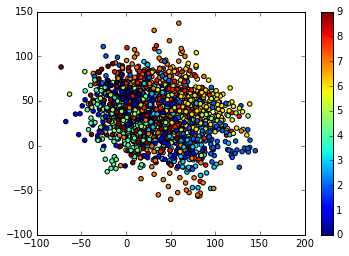

In [48]:
np.random.seed(0)
proj = np.random.normal(size=(X.shape[1], 2))
X_rand = np.dot(X, proj)

fig, ax = plt.subplots()
im = ax.scatter(X_rand[:, 0], X_rand[:, 1], c=y)
fig.colorbar(im);

Let's now use an unsupervised learning approach to visualize this same data.  We'll reduce the dimensionality of the data using Principal Component Analysis (PCA):

shape of result: (1797L, 2L)


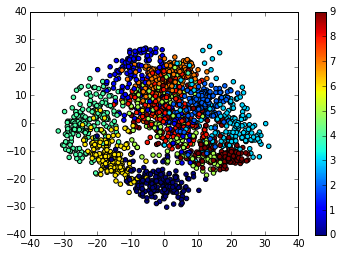

In [49]:
from sklearn.decomposition import PCA

# instantiate the model
model = PCA(n_components=2)

# fit the model: notice we don't pass the labels!
model.fit(X)

# transform the data to two dimensions
X_PCA = model.transform(X)
print "shape of result:", X_PCA.shape

# plot the results along with the labels
fig, ax = plt.subplots()
im = ax.scatter(X_PCA[:, 0], X_PCA[:, 1], c=y)
fig.colorbar(im);

We've reduced the dimensionality to two in a way that takes into account the structure of the data.
By comparison, a random projection does not conserve this structure:

# Measuring Prediction Performance

An important piece of the learning task is the measurement of prediction performance, also known as **model validation**.  We'll go into detail about this, but first motivate the approach with an example.

## The Importance of Splitting
Above we looked at a *confusion matrix*, which can be computed based on the results of any model. Let's look at another classification scheme here, the *K-Neighbors Classifier*

classification accuracy: 1.0


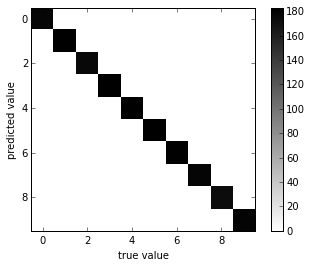

In [50]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets

digits = datasets.load_digits()
X, y = digits.data, digits.target

clf = KNeighborsClassifier(n_neighbors=1)
clf.fit(X, y)
y_pred = clf.predict(X)

print "classification accuracy:", metrics.accuracy_score(y, y_pred)
plot_confusion_matrix(y, y_pred)

Our classifier gives perfect results!  Have we settled on a perfect classification scheme?

**No!**  The *K*-neighbors classifier is an example of an instance-based classifier, which memorizes the input data and compares any unknown sample to it.  To accurately measure the performance, we need to use a separate *validation set*, which the model has not yet seen.

Scikit-learn contains utilities to split data into a training and validation set:

In [51]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print X_train.shape, X_test.shape

(1257L, 64L) (540L, 64L)


classification accuracy: 0.985185185185


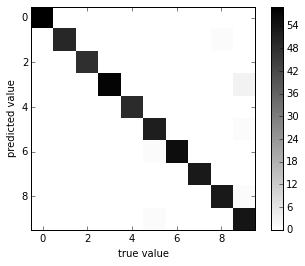

In [52]:
clf = KNeighborsClassifier(n_neighbors=1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print "classification accuracy:", metrics.accuracy_score(y_test, y_pred)
plot_confusion_matrix(y_test, y_pred)

This gives us a more accurate indication of how well the model is performing.

For this reason you should **always do a train/test split** when validating a model.

## Exploring Validation Metrics

Above, we used perhaps the most simple evaluation metric, the number of matches and mis-matches.  But this is not always sufficient.  For example, imagine you have a situation where you'd like to identify a rare class of event from within a large number of background sources (in my field, an example of this is finding variable stars from the background of non-varying stars).  This "number of matches" metric can break down:

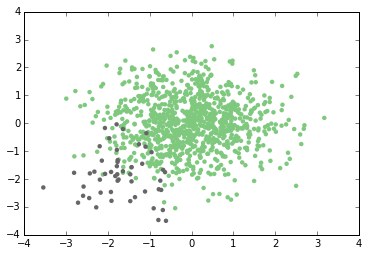

In [53]:
# Generate an un-balanced 2D dataset
np.random.seed(0)
X = np.vstack([np.random.normal(0, 1, (950, 2)),
               np.random.normal(-1.8, 0.8, (50, 2))])
y = np.hstack([np.zeros(950), np.ones(50)])

plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='none',
            cmap=plt.cm.Accent)

### Quick Exercise #1:

Use a *Support Vector Machine*, and see how well the model can classify this data.  You can use what we did above as a template:

In [54]:
from sklearn.svm import SVC
# First instantiate the "Support Vector Classifier" (SVC) model

# Next split the data (X and y) into a training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# fit the model to the training data
clf = SVC().fit(X_train, y_train)

# compute y_pred, the predicted labels of the test data
y_pred = clf.predict(X_test)


In [55]:
# Now that this is finished, we'll compute the classification rate
print "accuracy:", np.sum(y_test == y_pred) * 1. / len(y_test)

accuracy: 0.973333333333


Did you do well?  Would you say that this is a good classification scheme for the problem?

### The Problem with Simple Validation

The problem here is that we might not care how well we can classify the **background**, but might instead be concerned with successfully pulling-out an uncontaminated set of **foreground** sources.  We can get at this by computing statistics such as the **precision**, the **recall**, and the **f1 score**:

In [56]:
from sklearn import metrics
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
clf = SVC().fit(X_train, y_train)
y_pred = clf.predict(X_test)

print "accuracy:", metrics.accuracy_score(y_test, y_pred)
print "precision:", metrics.precision_score(y_test, y_pred)
print "recall:", metrics.recall_score(y_test, y_pred)
print "f1 score:", metrics.f1_score(y_test, y_pred)

accuracy: 0.968
precision: 0.833333333333
recall: 0.625
f1 score: 0.714285714286


#### What do these mean?

These are ways of taking into account not just the classification results, but the results **relative to the true category**.

- $$ {\rm accuracy} \equiv \frac{\rm correct~labels}{\rm total~samples} $$

- $$ {\rm precision} \equiv \frac{\rm true~positives}{\rm true~positives + false~positives} $$

- $$ {\rm recall} \equiv \frac{\rm true~positives}{\rm true~positives + false~negatives} $$

- $$ F_1 \equiv 2 \frac{\rm precision \cdot recall}{\rm precision + recall} $$

The **accuracy**, **precision**, **recall**, and **f1-score** all range from 0 to 1, with 1 being optimal.
Here we've used the following definitions:

- *True Positives* are those which are labeled ``1`` which are actually ``1``
- *False Positives* are those which are labeled ``1`` which are actually ``0``
- *True Negatives* are those which are labeled ``0`` which are actually ``0``
- *False Negatives* are those which are labeled ``0`` which are actually ``1``


We can quickly compute a summary of these statistics using scikit-learn's provided convenience function:

In [57]:
print metrics.classification_report(y_test, y_pred,target_names=['background', 'foreground'])

             precision    recall  f1-score   support

 background       0.97      0.99      0.98       234
 foreground       0.83      0.62      0.71        16

avg / total       0.97      0.97      0.97       250



This tells us that, though the overall correct classification rate is 97%, we only correctly identify 67% of the desired samples, and those that we label as positives are only 83% correct!  This is why you should make sure to carefully choose your metric when validating a model.

### Quick Exercise #2

Compare the *K Neighbors Classifier*, the *Gaussian Naive Bayes Classifier*, and the *Support Vector Machine Classifier* on this toy dataset, using their default parameters.  Which is most accurate?  Which is most precise?  Which has the best recall?

Imagine that you are a medical doctor, and here the features are biometric measurements, and the labels are

- 0 = no disease
- 1 = potential infection

For your patients, which classifier might you choose? (That is, would you be more concerned with accuracy, precision, or recall?)

## Cross-Validation

Using the simple train/test split as above can be useful, but there is a disadvantage: **You're ignoring a portion of your dataset**.  One way to address this is to use cross-validation.

The simplest cross-validation scheme involves running two trials, where you split the data into two parts, first training on one, then training on the other:

In [58]:
X1, X2, y1, y2 = train_test_split(X, y, test_size=0.5)
print X1.shape
print X2.shape

(500L, 2L)
(500L, 2L)


In [59]:
y2_pred = SVC().fit(X1, y1).predict(X2)
y1_pred = SVC().fit(X2, y2).predict(X1)

print np.mean([metrics.precision_score(y1, y1_pred),
               metrics.precision_score(y2, y2_pred)])

0.885416666667


This is known as **two-fold** cross-validation, and is a special case of *K*-fold cross validation.

Because it's such a common routine, scikit-learn has a K-fold cross-validation scheme built-in:

In [60]:
from sklearn.cross_validation import cross_val_score

# Let's do a 2-fold cross-validation of the SVC estimator
print cross_val_score(SVC(), X, y, cv=2, scoring='precision')

[ 0.73684211  0.875     ]


It's also possible to use ``sklearn.cross_validation.KFold`` and ``sklearn.cross_validation.StratifiedKFold`` directly, as well as other cross-validation models which you can find in the ``cross_validation`` module.

### Quick Exercise #3

The ``SVC`` classifier takes a parameter ``C`` whose default value is ``1``.  Using 5-fold cross-validation, make a plot of the precision as a function of ``C``, for the ``SVC`` estimator on this dataset.  For best results, use a logarithmic spacing of ``C`` between 0.01 and 100.

## Grid Search

This exercise you just completed is an example of a **grid search** for model evaluation.  Again, because this is such a common task, Scikit-learn has a grid search tool built-in, which is used as follows.  Note that ``GridSearchCV`` has a ``fit`` method: it is a meta-estimator: an estimator over estimators!

In [61]:
from sklearn.grid_search import GridSearchCV

clf = SVC()
Crange = np.logspace(-2, 2, 40)

grid = GridSearchCV(clf, param_grid={'C': Crange},
                    scoring='precision', cv=5)
grid.fit(X, y)

print "best parameter choice:", grid.best_params_

best parameter choice: {'C': 0.10608183551394483}


C:\Anaconda\lib\site-packages\sklearn\metrics\metrics.py:1771: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


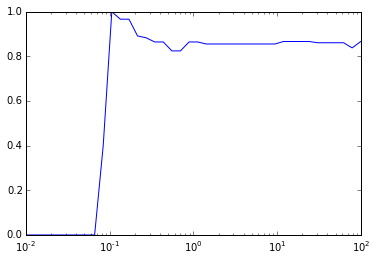

In [62]:
scores = [g[1] for g in grid.grid_scores_]
plt.semilogx(Crange, scores);

Grid search can come in very handy when you're tuning a model for a particular task.

### Quick Exercise #4

Use ``GridSearchCV`` with the nearest neighbors estimator (``sklearn.neighbors.KNeighborsClassifier``) to determine the optimal number of neighbors (``n_neighbors``) for classifying digits (use accuracy as your metric).

In [63]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_digits
digits = load_digits()
X, y = digits.data, digits.target

# construct the K Neighbors classifier


# Use GridSearchCV to find the best accuracy given choice of ``n_neighbors``


# Plot the accuracy as a function of the number of neighbors.
# Does this change significantly if you use more/fewer folds?

# Overfitting, Underfitting and Model Selection

Now that we've gone over the basics of metrics, validation, and cross-validation, it's time to go into even more depth regarding model selection.

The issues associated with validation and 
cross-validation are some of the most important
aspects of the practice of machine learning.  Selecting the optimal model
for your data is vital, and is a piece of the problem that is not often
appreciated by machine learning practitioners.

Of core importance is the following question:

**If our estimator is underperforming, how should we move forward?**

- Use simpler or more complicated model?
- Add more features to each observed data point?
- Add more training samples?

The answer is often counter-intuitive.  In particular, **Sometimes using a
more complicated model will give _worse_ results.**  Also, **Sometimes adding
training data will not improve your results.**  The ability to determine
what steps will improve your model is what separates the successful machine
learning practitioners from the unsuccessful.

## Illustration of the Bias-Variance Tradeoff

For this section, we'll work with a simple 1D regression problem.  This will help us to
easily visualize the data and the model, and the results generalize easily to  higher-dimensional
datasets.  We'll explore a simple **linear regression** problem.
This can be accomplished within scikit-learn with the `sklearn.linear_model` module.

We'll create a simple nonlinear function that we'd like to fit

In [64]:
def test_func(x, err=0.5):
    y = 10 - 1. / (x + 0.1)
    if err > 0:
        y = np.random.normal(y, err)
    return y

Now let's create a realization of this dataset:

In [65]:
def make_data(N=40, error=1.0, random_seed=1):
    # randomly sample the data
    np.random.seed(1)
    X = np.random.random(N)[:, np.newaxis]
    y = test_func(X.ravel(), error)
    
    return X, y

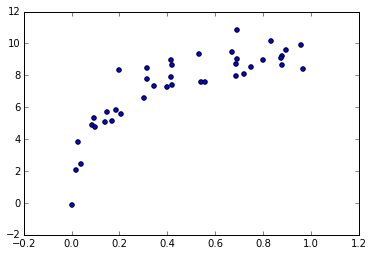

In [66]:
X, y = make_data(40, error=1)
plt.scatter(X.ravel(), y)

Now say we want to perform a regression on this data.  Let's use the built-in linear regression function to compute a fit:

mean squared error: 1.78514645061


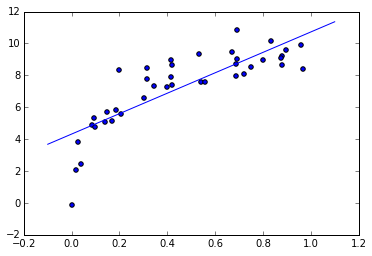

In [67]:
X_test = np.linspace(-0.1, 1.1, 500)[:, None]

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)
y_test = model.predict(X_test)

plt.scatter(X.ravel(), y)
plt.plot(X_test.ravel(), y_test)
print "mean squared error:", metrics.mean_squared_error(model.predict(X), y)

We have fit a straight line to the data, but clearly this model is not a good choice.  We say that this model is **biased**, or that it **under-fits** the data.

Let's try to improve this by creating a more complicated model.  We can do this by adding degrees of freedom, and computing a polynomial regression over the inputs.  Let's make this easier by creating a quick PolynomialRegression estimator:

In [68]:
class PolynomialRegression(LinearRegression):
    """Simple Polynomial Regression to 1D data"""
    def __init__(self, degree=1, **kwargs):
        self.degree = degree
        LinearRegression.__init__(self, **kwargs)
        
    def fit(self, X, y):
        if X.shape[1] != 1:
            raise ValueError("Only 1D data valid here")
        Xp = X ** (1 + np.arange(self.degree))
        return LinearRegression.fit(self, Xp, y)
        
    def predict(self, X):
        Xp = X ** (1 + np.arange(self.degree))
        return LinearRegression.predict(self, Xp)

Now we'll use this to fit a quadratic curve to the data.

mean squared error: 0.919717192242


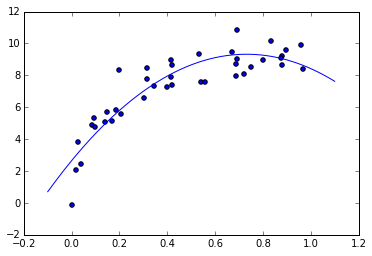

In [69]:
model = PolynomialRegression(degree=2)
model.fit(X, y)
y_test = model.predict(X_test)

plt.scatter(X.ravel(), y)
plt.plot(X_test.ravel(), y_test)
print "mean squared error:", metrics.mean_squared_error(model.predict(X), y)

This reduces the mean squared error, and makes a much better fit.  What happens if we use an even higher-degree polynomial?

mean squared error: 0.375551589237


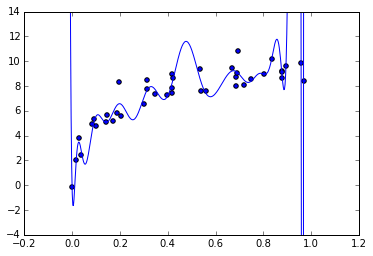

In [70]:
model = PolynomialRegression(degree=30)
model.fit(X, y)
y_test = model.predict(X_test)

plt.scatter(X.ravel(), y)
plt.plot(X_test.ravel(), y_test)
plt.ylim(-4, 14)
print "mean squared error:", metrics.mean_squared_error(model.predict(X), y)

When we increase the degree to this extent, it's clear that the resulting fit is no longer reflecting the true underlying distribution, but is more sensitive to the noise in the training data. For this reason, we call it a **high-variance model**, and we say that it **over-fits** the data.

## Detecting over-fitting
Clearly, computing the error on the training data is not enough (we saw this previously).  But computing this *training error* can help us determine what's going on: in particular, comparing the training error and the validation error can give you an indication of how well your data is being fit.

Let's do this:

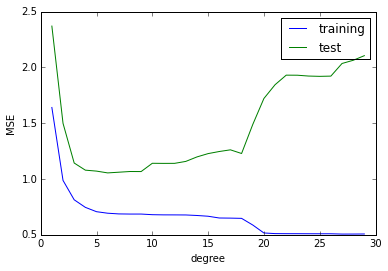

In [71]:
degrees = np.arange(1, 30)

X, y = make_data(100, error=1.0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

training_error = []
test_error = []
mse = metrics.mean_squared_error

for d in degrees:
    model = PolynomialRegression(d).fit(X_train, y_train)
    training_error.append(mse(model.predict(X_train), y_train))
    test_error.append(mse(model.predict(X_test), y_test))
    
# note that the test error can also be computed via cross-validation
plt.plot(degrees, training_error, label='training')
plt.plot(degrees, test_error, label='test')
plt.legend()
plt.xlabel('degree')
plt.ylabel('MSE')

This is a typical bias/variance plot.

On the **Left Side** of the plot, we have a **high-bias** model, characterized by the training and test data showing equally bad performance.  This shows that the model is **under-fitting** the data, because it does equally poorly on both known and unknown values.

On the **Right Side** of the plot, we have a **high-variance model**, characterized by a divergence of the training and test data.  Here the model is **over-fitting** the data: in other words, the particular noise distribution of the input data has too much effect on the result.

The optimal model here will be around the point where the **test** error is minimized.

### Quick Exercise

Let's appy this learning curve idea to a **Decision Tree** regression on this dataset.

``sklearn.tree.DecisionTree`` takes a number of hyper-parameters, but one that can really control the over-fitting, under-fitting is the ``max_depth`` parameter especially controls the tradeoff between bias and variance.

Generate a dataset like the one above, but containing 500 points, and use a Decision Tree classification to explore the effect of the ``max_depth`` parameter on the bias/variance tradeoff.  What is the optimal value?

One popular and effective way to address over-fitting is to use **Ensemble methods**.  ``sklearn.ensemble.RandomForestRegressor`` uses multiple randomized decision trees and averages their results.  The ensemble of estimators can often do better than any individual estimator for data that is over-fit.  Repeat the above experiment using the Random Forest regressor, with 10 trees.  What is the best ``max_depth`` for this model?  Does the accuracy improve?

## Illustration of Learning Curves

The exact turning-point of the tradeoff between bias and variance is highly dependent on the number of training points used.  Here we'll illustrate the use of *learning curves*, which display this property.

The idea is to plot the mean-squared-error for the training and test set as a function of *Number of Training Points*

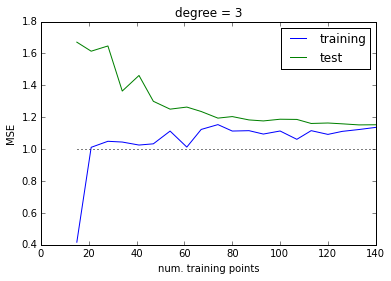

In [72]:
X, y = make_data(200, error=1.0)
degree = 3

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

N_range = np.linspace(15, X_train.shape[0], 20).astype(int)

def plot_learning_curve(degree=3):
    training_error = []
    test_error = []
    mse = metrics.mean_squared_error
    
    for N in N_range:
        XN = X_train[:N]
        yN = y_train[:N]
    
        model = PolynomialRegression(degree).fit(XN, yN)
        training_error.append(mse(model.predict(XN), yN))
        test_error.append(mse(model.predict(X_test), y_test))
      
    plt.plot(N_range, training_error, label='training')
    plt.plot(N_range, test_error, label='test')
    plt.plot(N_range, np.ones_like(N_range), ':k')
    plt.legend()
    plt.title('degree = {0}'.format(degree))
    plt.xlabel('num. training points')
    plt.ylabel('MSE')
    
plot_learning_curve(3)

This shows a typical learning curve: for very few training points, there is a large separation between the training and test error, which indicates **over-fitting**.  Given the same model, for a large number of training points, the training and testing errors converge, which indicates potential **under-fitting**.

It is easy to see that, in this plot, if you'd like to reduce the MSE down to the nominal value of 1.0 (which is the magnitude of the scatter we put in when constructing the data), then adding more samples will *Never* get you there.  For $d=3$, we've already converged.  What about for $d=1$?

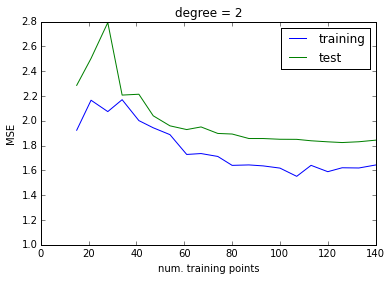

In [73]:
plot_learning_curve(2)

We see that it hasn't converged yet: you still might expect to decrease the test error by adding more points.

What about the other extreme?

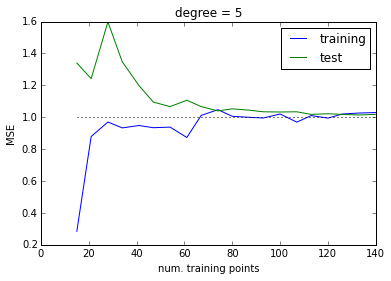

In [74]:
plot_learning_curve(5)

For $d=5$, it's converged, but to a better value than for $d=3$.

Thus you can **bring the two curves closer together** by adding more points, but you can **bring the convergence level down** only by adding complexity to the model.

This can be very useful, because it gives you a hint about how to improve upon results which are sub-par.  To make this more concrete, imagine an astronomy project in which the results are not robust enough.  You must think about whether to spend your valuable telescope time observing *more objects* to get a larger training set, or *more attributes of each object* in order to improve the model.  The answer to this question is important, and can be addressed using these metrics.

### Final Exercise

Let's return to our digits data.  Using what you've learned here, explore several classifiers and find the optimal classifier for this dataset.  What is the best **accuracy** you can attain on a 5-fold cross-validation over the data?  Are there indications that more training data would be helpful in improving this accuracy?